In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import EvolutionStrategy as EvosStrat
importlib.reload(EvosStrat)
EvolutionStrategyClass = EvosStrat.EvolutionStrategy
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [3]:
parent_loc = "./Evolution_stratergy_parameter_search/stored_data/"
os.listdir(parent_loc)

['param_find1610649147.5987375.pkl']

In [4]:
file = os.listdir(parent_loc)[-1]

In [5]:
result_list = pickle.load(open(parent_loc + file, "rb"))

In [6]:
results_df = pd.DataFrame()
for result in result_list:
    results_df = results_df.append(result, ignore_index=True)
results_df.head()

,archive_minimum_acceptable_dissimilarity,average_runtime,best_performance,best_performance_final,bound_enforcing_method,child_to_parent_ratio,maximum_archive_length,mean_performance,mean_performance_final,mutation_covariance_initialisation_fraction_of_range,...,objective_function,parent_number,raw_results,selection_method,standard_deviation_clipping_fraction_of_range,std_perormance,std_perormance_final,termination_min_abs_difference,x_bounds,x_length
0,0.1,171.401333,-1510.998477,-691.787624,not_clipping,2.0,100.0,-1429.731841,-546.881420,0.01,...,<function rana_func at 0x00000258AAC67EE0>,10.0,"[-1510.9984765594054, -1348.465205925551]",standard_mew_comma_lambda,0.01,81.266635,144.906204,0.000001,"(-500, 500)",5.0
1,0.1,45.997609,-1582.497124,-1582.496915,not_clipping,2.0,100.0,-1463.807228,-1463.807122,0.01,...,<function rana_func at 0x00000258AAC67EE0>,10.0,"[-1345.117331544416, -1582.4971243317905]",standard_mew_comma_lambda,0.01,118.689896,118.689793,0.000001,"(-500, 500)",5.0
2,0.1,49.249950,-1597.575249,-1563.725064,not_clipping,2.0,100.0,-1469.511051,-1419.407394,0.01,...,<function rana_func at 0x00000258AAC67EE0>,10.0,"[-1341.4468540541493, -1597.5752487283576]",standard_mew_comma_lambda,0.01,128.064197,144.317671,0.000001,"(-500, 500)",5.0
3,0.1,0.001012,-734.021704,-734.021704,not_clipping,11.0,100.0,-703.237684,-703.237684,0.01,...,<function rana_func at 0x00000258AAC67EE0>,1.0,"[-734.0217042678419, -672.4536640317971]",standard_mew_comma_lambda,0.01,30.784020,30.784020,0.000001,"(-500, 500)",5.0
4,0.1,0.000000,-734.021704,-734.021704,not_clipping,11.0,100.0,-703.237684,-703.237684,0.01,...,<function rana_func at 0x00000258AAC67EE0>,1.0,"[-734.0217042678419, -672.4536640317971]",standard_mew_comma_lambda,0.01,30.784020,30.784020,0.000001,"(-500, 500)",5.0


In [7]:
results_df.columns

Index(['archive_minimum_acceptable_dissimilarity', 'average_runtime',
       'best_performance', 'best_performance_final', 'bound_enforcing_method',
       'child_to_parent_ratio', 'maximum_archive_length', 'mean_performance',
       'mean_performance_final',
       'mutation_covariance_initialisation_fraction_of_range',
       'mutation_method', 'objective_function', 'parent_number', 'raw_results',
       'selection_method', 'standard_deviation_clipping_fraction_of_range',
       'std_perormance', 'std_perormance_final',
       'termination_min_abs_difference', 'x_bounds', 'x_length'],
      dtype='object')

In [8]:
output_names = ['average_runtime','best_performance', 'best_performance_final', 'child_to_parent_ratio', 'mean_performance',
       'mean_performance_final','mutation_method', 'parent_number',
       'selection_method','std_perormance_final']

In [9]:
def get_best_values_and_return_dict(spec_names, spec_vals, output_names=output_names):
    df = results_df
    for spec_name, spec_val in zip(spec_names, spec_vals):
        df = df.loc[results_df[spec_name] == spec_val]
    argmin_indx = df["mean_performance_final"].argmin()
    output_dict = {}
    for output_name in output_names:
        output_dict[output_name] = df.iloc[argmin_indx][output_name]
    return output_dict

In [10]:
results_df['mutation_method'].unique()

array(['complex', 'diagonal', 'simple'], dtype=object)

In [16]:
report_table = pd.DataFrame()
for selection_method in ['standard_mew_comma_lambda']:#, "elitist"]:
    for mutation_method in ['complex', 'diagonal', 'simple']:
        spec_names = ["mutation_method", "selection_method"] 
        spec_vals = [mutation_method]
        output_dict = get_best_values_and_return_dict(spec_names, spec_vals)
        report_table = report_table.append(output_dict, ignore_index=True)
report_table

,average_runtime,best_performance,best_performance_final,child_to_parent_ratio,mean_performance,mean_performance_final,mutation_method,parent_number,selection_method,std_perormance_final
0,32.089099,-1657.392767,-1612.851114,11.0,-1636.232658,-1596.721308,complex,23.0,standard_mew_comma_lambda,16.129806
1,31.188808,-1921.820948,-1917.426302,11.0,-1896.730477,-1894.533154,diagonal,45.0,standard_mew_comma_lambda,22.893148
2,31.235031,-1878.637001,-1873.050778,11.0,-1858.581272,-1844.629691,simple,45.0,standard_mew_comma_lambda,28.421087


In [17]:
report_table["number of offspring"] = report_table['child_to_parent_ratio'] * report_table['parent_number']

In [18]:
column_order = ["mutation_method", "selection_method",'child_to_parent_ratio', "number of offspring", "mean_performance_final", 
                "std_perormance_final", "best_performance_final", "mean_performance", "average_runtime"]
report_table = report_table[column_order]
rename_dict = {"mutation_method": "mutation method", 
               "mean_performance_final": "mean final performance", 
               "std_perormance_final": "std dev final performance", 
               "best_performance_final": "best final performance (across seeds)", 
               "mean_performance": "mean best objective (within run)", 
               "average_runtime": "average runtime (s)",
               'child_to_parent_ratio' : "Offspring per parent"
}
report_table = report_table.rename(columns = rename_dict)
report_table = report_table.round(2)
report_table

,mutation method,selection_method,Offspring per parent,number of offspring,mean final performance,std dev final performance,best final performance (across seeds),mean best objective (within run),average runtime (s)
0,complex,standard_mew_comma_lambda,11.0,253.0,-1596.72,16.13,-1612.85,-1636.23,32.09
1,diagonal,standard_mew_comma_lambda,11.0,495.0,-1894.53,22.89,-1917.43,-1896.73,31.19
2,simple,standard_mew_comma_lambda,11.0,495.0,-1844.63,28.42,-1873.05,-1858.58,31.24


In [19]:
report_table.T.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>mutation method</th>\n      <td>complex</td>\n      <td>diagonal</td>\n      <td>simple</td>\n    </tr>\n    <tr>\n      <th>selection_method</th>\n      <td>standard_mew_comma_lambda</td>\n      <td>standard_mew_comma_lambda</td>\n      <td>standard_mew_comma_lambda</td>\n    </tr>\n    <tr>\n      <th>Offspring per parent</th>\n      <td>11</td>\n      <td>11</td>\n      <td>11</td>\n    </tr>\n    <tr>\n      <th>number of offspring</th>\n      <td>253</td>\n      <td>495</td>\n      <td>495</td>\n    </tr>\n    <tr>\n      <th>mean final performance</th>\n      <td>-1596.72</td>\n      <td>-1894.53</td>\n      <td>-1844.63</td>\n    </tr>\n    <tr>\n      <th>std dev final performance</th>\n      <td>16.13</td>\n      <td>22.89</td>\n      <td>28.42</td>\n    </tr>\n    <tr

In [14]:
selection_method = "standard_mew_comma_lambda"
mutation_method = "complex"

In [27]:
df = results_df.loc[(results_df["selection_method"] == selection_method) & (results_df["mutation_method"] == mutation_method)]

have to enter these value manually

In [44]:
parent_number_n = 3 #df["parent_number"].unique().shape[0] 
child_to_parent_ratio_n = 3 #df["child_to_parent_ratio"].unique().shape[0]
parent_number_n, child_to_parent_ratio_n

(3, 3)

In [45]:
parent_data = df["parent_number"].to_numpy()
child_to_parent_ratio_data = df["child_to_parent_ratio"].to_numpy()
offspring_data = parent_data * child_to_parent_ratio_data
#offspring_data[0:3], parent_data[0:3], child_to_parent_ratio_data[0:3]

In [46]:
x1 = child_to_parent_ratio_data.reshape(parent_number_n,child_to_parent_ratio_n)
x2 = offspring_data.reshape(parent_number_n, child_to_parent_ratio_n)
#z = df[column].reshape(parent_number_n,child_to_parent_ratio_n)

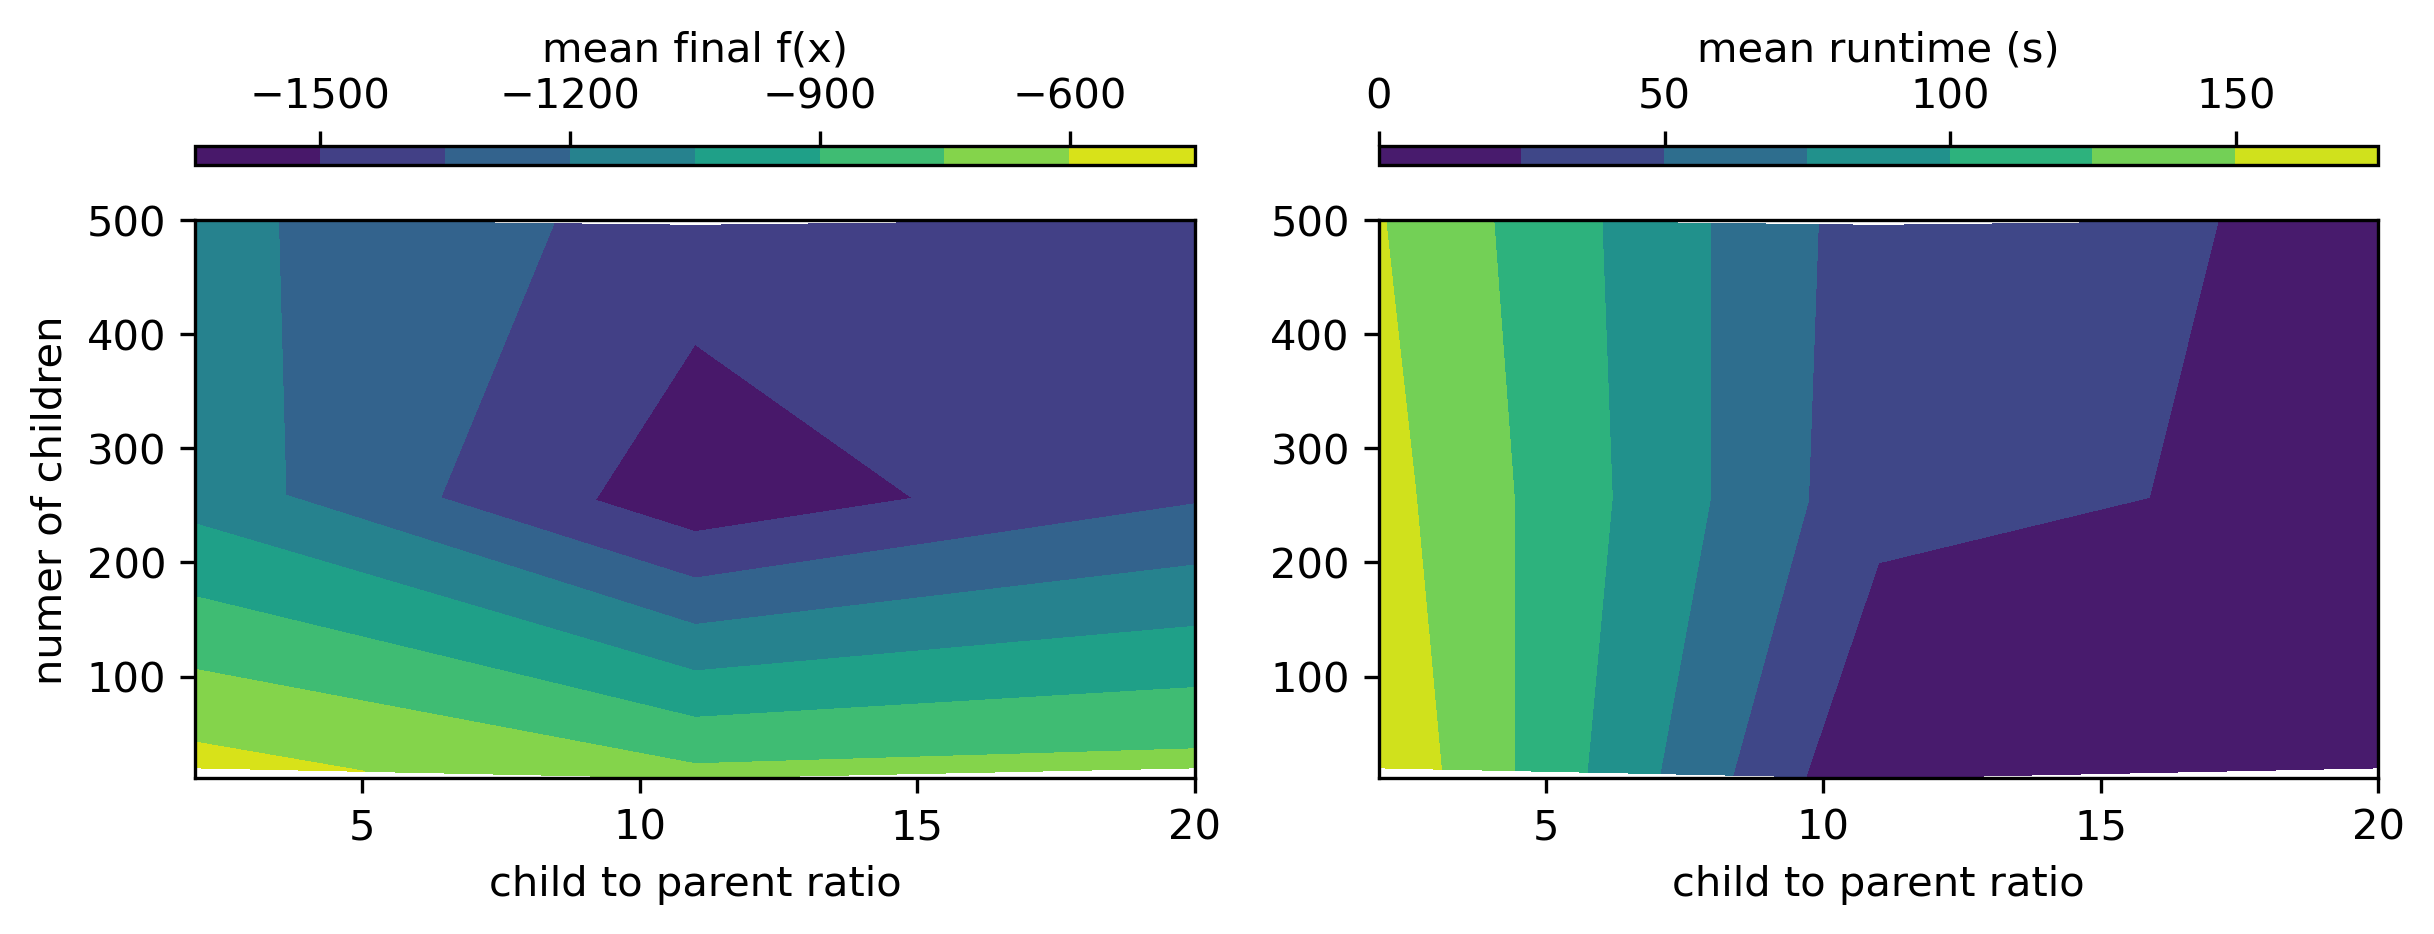

In [52]:
fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
#labels = ["final f(x)", "std f(x)", "time (s)"]
#for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
labels = ["mean final f(x)", "mean runtime (s)"]
for i, column in enumerate(["mean_performance_final", "average_runtime"]):
    z = df[column].to_numpy().reshape(parent_number_n,child_to_parent_ratio_n)
    plot_list = []
    cs = ax[i].contourf(x1,x2,z)
    CB = fig.colorbar(cs, label=labels[i], ax=ax[i], location='top')
    tick_locator = mpl.ticker.MaxNLocator(nbins=4)
    CB.locator = tick_locator
    CB.update_ticks()

ax[0].set_ylabel("numer of children")
#ax[1].set_ylabel("Max MC length")
ax[0].set_xlabel("child to parent ratio")
ax[1].set_xlabel("child to parent ratio")
#fig.tight_layout()
fig.savefig("./Figures/ES_offsring_n_OP_ratio_complex_mutation_mew_comma_lambda_selection.png")